In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
train = pd.read_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 1/DATASET/train.csv").drop("Unnamed: 0", axis = 1)
test = pd.read_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 1/DATASET/test.csv").drop("Unnamed: 0", axis = 1)

## Farm.Name

In [71]:
pd.set_option("display.max_rows", None)
train[['Farm.Name', 'Altitude','Country.of.Origin']].sort_values(by='Farm.Name')

,Farm.Name,Altitude,Country.of.Origin
280,agropecuaria quiagral,4300,2
366,agropecuaria quiagral,4300,2
350,agropecuaria quiagral,4300,2
108,agropecuaria quiagral,4300,2
302,agropecuaria quiagral,4300,2
447,agropecuaria quiagral,4300,2
6,agropecuaria quiagral,4300,2
80,agua de la mariposa,1400,3
263,aprocafi,1550,2
23,"arroyo triste, arroyo triste, san jose vista h...",1100,3


## DATE

In [ ]:
# Grading.Date 열의 값을 파싱하여 년, 월, 일로 나누는 함수 정의
def parse_date(date_string):
    try:
        # 날짜 문자열을 datetime 객체로 변환
        date = pd.to_datetime(date_string)
        # 년, 월, 일 추출
        year = date.year
        month = date.month
        day = date.day
        return year, month, day, date
    except:
        return None, None, None, None

# Grading.Date 열에서 년, 월, 일 추출하여 새로운 열에 추가
train['Grading.Year'], train['Grading.Month'], train['Grading.Day'], train['Grading.Date']= zip(*train['Grading.Date'].apply(parse_date))
test['Grading.Year'], test['Grading.Month'], test['Grading.Day'],test['Grading.Date']= zip(*test['Grading.Date'].apply(parse_date))

In [9]:
train['Grading.Day'] = train['Grading.Date'].dt.day_name()


In [10]:
train['Grading.Day']

0         Friday
1         Friday
2         Friday
3         Friday
4         Friday
         ...    
580       Friday
581       Monday
582    Wednesday
583    Wednesday
584      Tuesday
Name: Grading.Day, Length: 585, dtype: object

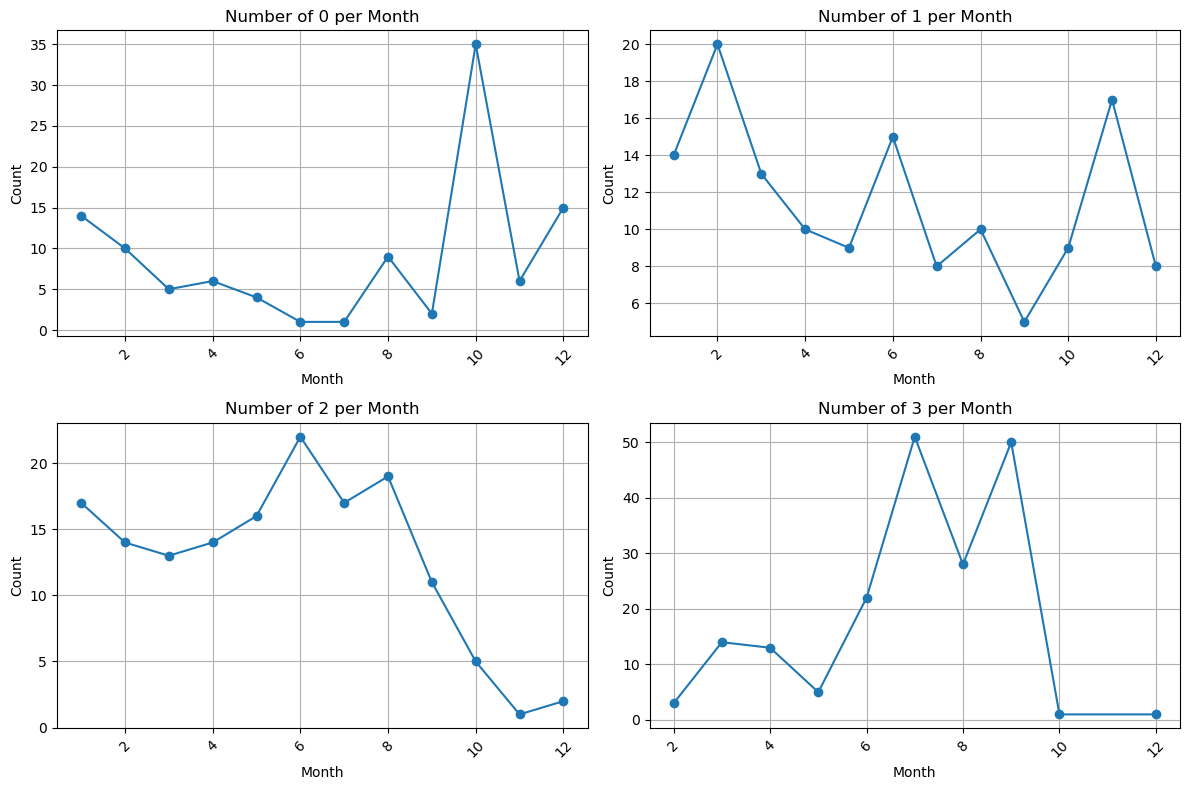

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# train 데이터프레임으로 변환
train_df = train[['Grading.Month', 'Country.of.Origin']].value_counts().reset_index(name='count')

# Grading.Month를 기준으로 정렬
sorted_train_df = train_df.sort_values(by='Grading.Month')

# 각 국가별로 데이터프레임 분할
countries = sorted_train_df['Country.of.Origin'].unique()
countries = sorted(countries)  # 국가 순서를 0, 1, 2, 3으로 고정

plt.figure(figsize=(12, 8))

# 각 국가에 대한 서브플롯 생성
for i, country in enumerate(countries, 1):
    plt.subplot(2, 2, i)
    country_df = sorted_train_df[sorted_train_df['Country.of.Origin'] == country]
    plt.plot(country_df['Grading.Month'], country_df['count'], marker='o')
    plt.title(f'Number of {country} per Month')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()


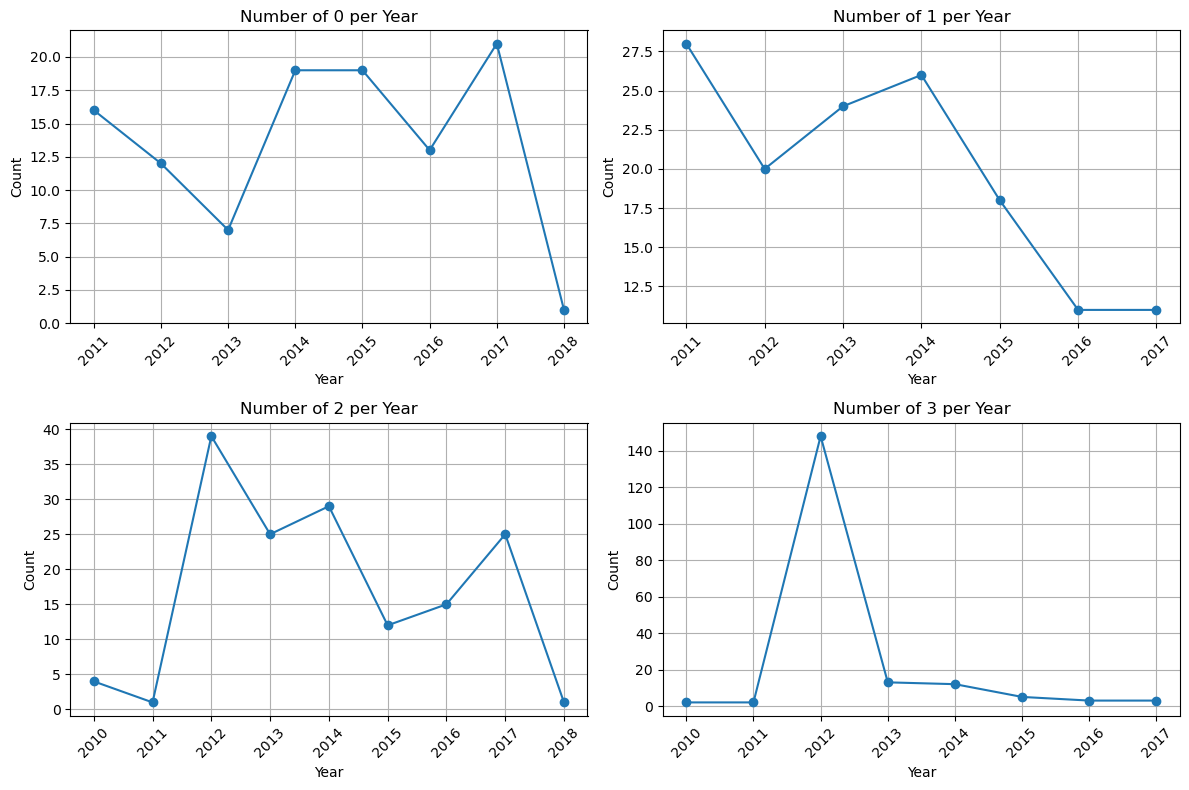

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# train 데이터프레임으로 변환
train_df = train[['Grading.Year', 'Country.of.Origin']].value_counts().reset_index(name='count')

# Grading.Year를 기준으로 정렬
sorted_train_df = train_df.sort_values(by='Grading.Year')

# 각 국가별로 데이터프레임 분할
countries = sorted_train_df['Country.of.Origin'].unique()
countries = sorted(countries)  # 국가 순서를 0, 1, 2, 3으로 고정

plt.figure(figsize=(12, 8))

# 각 국가에 대한 서브플롯 생성
for i, country in enumerate(countries, 1):
    plt.subplot(2, 2, i)
    country_df = sorted_train_df[sorted_train_df['Country.of.Origin'] == country]
    plt.plot(country_df['Grading.Year'], country_df['count'], marker='o')
    plt.title(f'Number of {country} per Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()


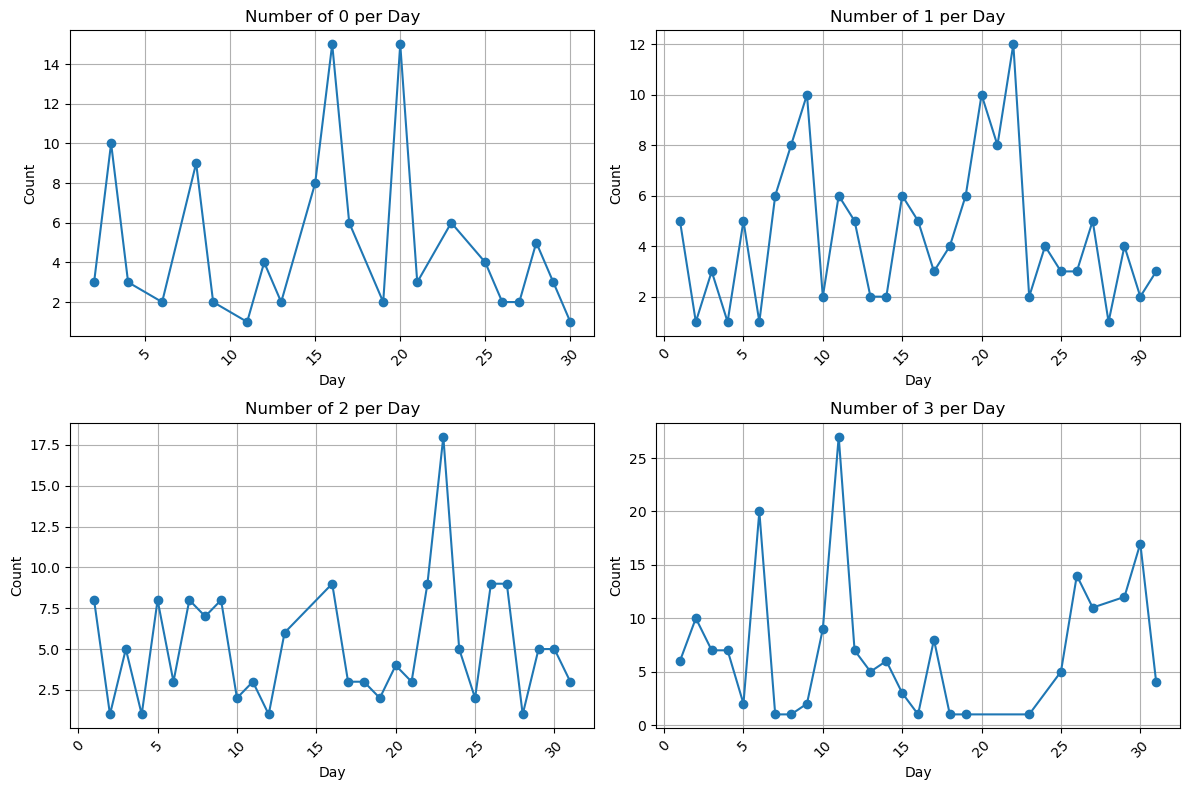

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# train 데이터프레임으로 변환
train_df = train[['Grading.Day', 'Country.of.Origin']].value_counts().reset_index(name='count')

# Grading.Day를 기준으로 정렬
sorted_train_df = train_df.sort_values(by='Grading.Day')

# 각 국가별로 데이터프레임 분할
countries = sorted_train_df['Country.of.Origin'].unique()
countries = sorted(countries)  # 국가 순서를 0, 1, 2, 3으로 고정

plt.figure(figsize=(12, 8))

# 각 국가에 대한 서브플롯 생성
for i, country in enumerate(countries, 1):
    plt.subplot(2, 2, i)
    country_df = sorted_train_df[sorted_train_df['Country.of.Origin'] == country]
    plt.plot(country_df['Grading.Day'], country_df['count'], marker='o')
    plt.title(f'Number of {country} per Day')
    plt.xlabel('Day')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()


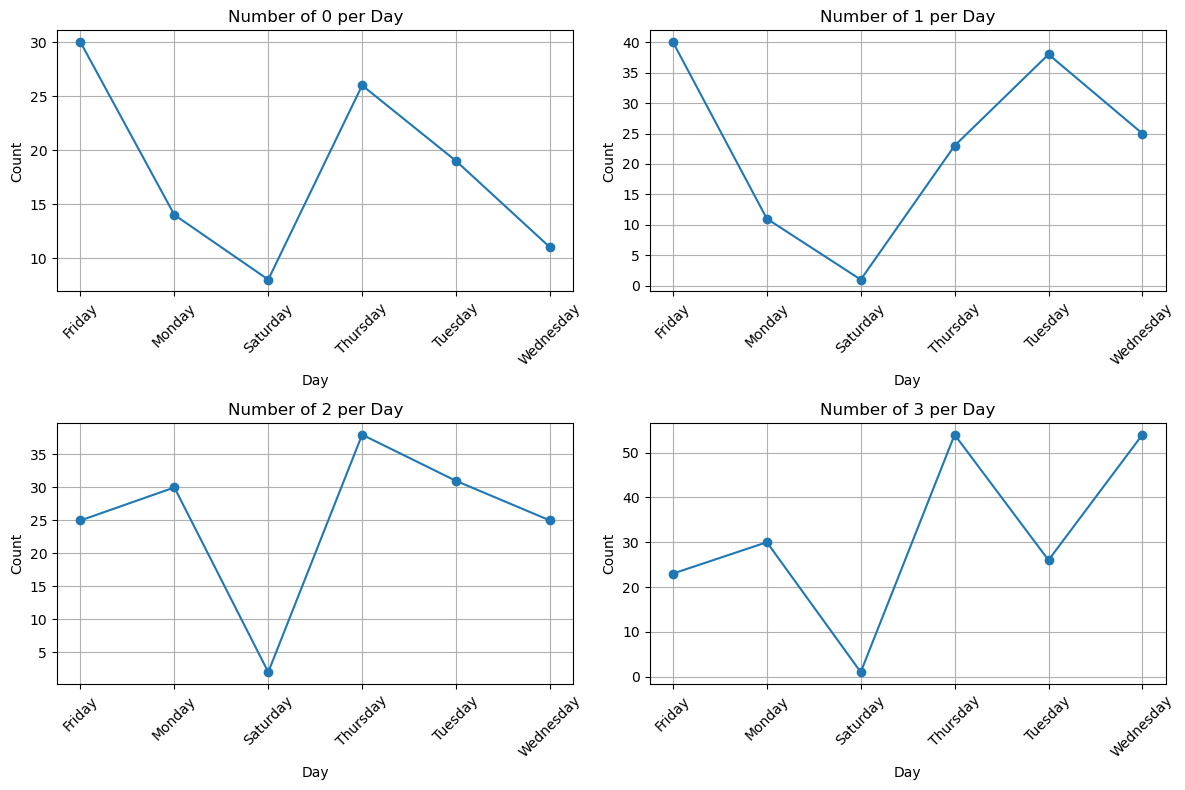

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# train 데이터프레임으로 변환
train_df = train[['Grading.Day', 'Country.of.Origin']].value_counts().reset_index(name='count')

# Grading.Day를 기준으로 정렬
sorted_train_df = train_df.sort_values(by='Grading.Day')

# 각 국가별로 데이터프레임 분할
countries = sorted_train_df['Country.of.Origin'].unique()
countries = sorted(countries)  # 국가 순서를 0, 1, 2, 3으로 고정

plt.figure(figsize=(12, 8))

# 각 국가에 대한 서브플롯 생성
for i, country in enumerate(countries, 1):
    plt.subplot(2, 2, i)
    country_df = sorted_train_df[sorted_train_df['Country.of.Origin'] == country]
    plt.plot(country_df['Grading.Day'], country_df['count'], marker='o')
    plt.title(f'Number of {country} per Day')
    plt.xlabel('Day')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()


## WEIGHT

In [37]:
def convert_to_kg(value):
    # 만약 값이 비어있으면 그대로 반환
    if pd.isna(value):
        return float(value), None
    
    # 만약 값에 'kg'가 포함되어 있다면 이를 삭제한 후 반환
    elif 'kg' in str(value):
        return float(value.replace('kg', '').strip()), 0
    
    # 만약 값이 'lbs'로 끝나면 lbs를 kg로 변환하여 반환
    elif str(value).endswith('lbs'):
        weight_in_lbs = float(value.replace('lbs', '').strip())
        weight_in_kg = weight_in_lbs * 0.453592  # 1 lbs = 0.453592 kg
        return weight_in_kg, 1
    # 그 외의 경우는 단위가 없는 값으로 간주하여 kg로 반환
    else:
        return float(value), 2

train['Converted.Bag.Weight'], train['Bag.Unit'] = zip(*train['Bag.Weight'].apply(convert_to_kg))
test['Converted.Bag.Weight'], test['Bag.Unit'] = zip(*test['Bag.Weight'].apply(convert_to_kg))


In [38]:
train['Converted.Bag.Weight']

0       1.00000
1      70.00000
2      69.00000
3       2.00000
4       2.26796
         ...   
580     2.00000
581    69.00000
582     1.00000
583    70.00000
584    70.00000
Name: Converted.Bag.Weight, Length: 585, dtype: float64

In [39]:
train['Total_Weight'] = train['Converted.Bag.Weight'] * train['Number.of.Bags']
test['Total_Weight'] = test['Converted.Bag.Weight'] * test['Number.of.Bags']


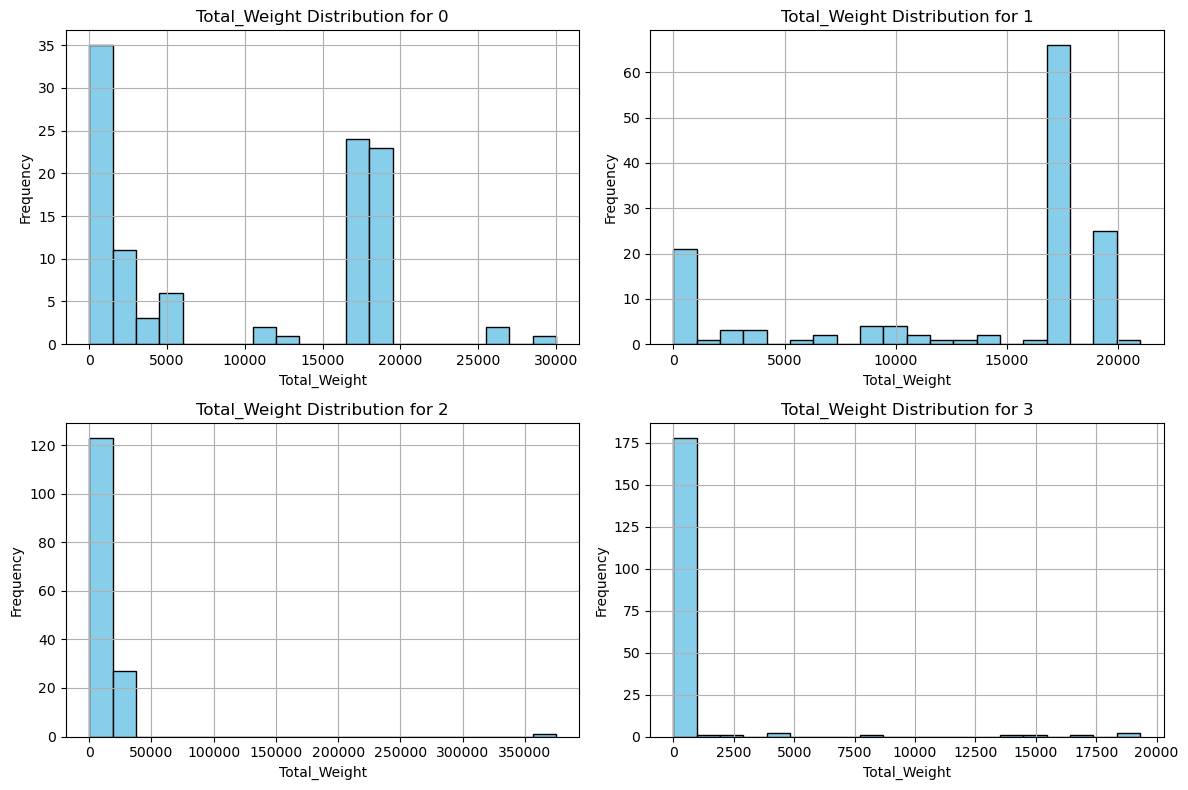

In [40]:
# train 데이터프레임으로 변환
train_df = train.copy()

# 각 나라별로 데이터프레임 분할
countries = train_df['Country.of.Origin'].unique()

countries = sorted(countries)
plt.figure(figsize=(12, 8))

# 각 나라에 대한 시각화
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.hist(country_df['Total_Weight'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Total_Weight Distribution for {country}')
    plt.xlabel('Total_Weight')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [41]:
import re

def extract_non_numeric(text):
    non_numeric = re.findall(r'[^0-9.]', str(text))
    return non_numeric

def remove_whitespace_and_hyphen(lst):
    text = ''.join(lst)
    return re.sub(r'[\s-]', '', text)

# Altitude 열에서 숫자 추출
altitude_numbers = train['Altitude'].apply(extract_non_numeric)
clean_altitude = altitude_numbers.apply(remove_whitespace_and_hyphen)

In [42]:
clean_altitude

0          nan
1       deamsn
2             
3             
4          nan
        ...   
580           
581           
582           
583       msnm
584    deamsnm
Name: Altitude, Length: 585, dtype: object

In [45]:
# cleaned_altitude를 데이터프레임으로 변환
cleaned_altitude_df = pd.DataFrame(clean_altitude.values, columns=['Cleaned_Altitude'])

In [46]:
cleaned_altitude_df

,Cleaned_Altitude
0,nan
1,deamsn
2,
3,
4,nan
...,...
580,
581,
582,
583,msnm


In [47]:
# train 데이터프레임의 Country.of.Origin 열과 cleaned_altitude_df 합치기
train = pd.concat([train, cleaned_altitude_df], axis=1)

In [54]:
train[['Cleaned_Altitude', 'Country.of.Origin']].value_counts().sort_values()


Cleaned_Altitude           Country.of.Origin
tometers                   3                      1
oo                         3                      1
mts                        1                      1
mtr                        3                      1
msm                        2                      1
meters(                    1                      1
metros                     0                      1
meter                      3                      1
amtrsaniveldelmar          2                      1
amsnm                      1                      1
mmm                        0                      1
a                          3                      1
pies                       2                      2
feet                       2                      2
masl                       3                      2
deamsn                     1                      2
ametrossobreelniveldelmar  2                      2
m                          2                      2
mm                 